## Otávio Leite Bastos
Modelo antigo de rede copiado do aluno Marcelo Bacchetti

#Estimando Preços das Casas da Califórnia

- Dataset descrito no google ML crash course:
  - https://developers.google.com/machine-learning/crash-course/california-housing-data-description
- Dataset via Scikit-learn:
  - https://scikit-learn.org/stable/auto_examples/inspection/plot_partial_dependence.html#sphx-glr-auto-examples-inspection-plot-partial-dependence-py
- Dataset via Pratap (possui post Medium):
  - https://github.com/gurupratap-matharu/machine-learning-regression

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd

In [ ]:
housing = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

housing['above_equal_500K'] = (housing['median_house_value']>=500000).astype(float)
# housing['under_500K'] = (housing['median_house_value']<500000).astype(float)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 10 columns):
longitude             17000 non-null float64
latitude              17000 non-null float64
housing_median_age    17000 non-null float64
total_rooms           17000 non-null float64
total_bedrooms        17000 non-null float64
population            17000 non-null float64
households            17000 non-null float64
median_income         17000 non-null float64
median_house_value    17000 non-null float64
above_equal_500K      17000 non-null float64
dtypes: float64(10)
memory usage: 1.3 MB


In [ ]:
housing[housing['median_house_value']<500000].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,above_equal_500K
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,0.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,0.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,0.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,0.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,0.0


In [ ]:
housing[housing['median_house_value']>=500000].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,above_equal_500K
215,-116.43,33.75,24.0,2596.0,438.0,473.0,237.0,3.7727,500001.0,1.0
260,-116.55,33.84,28.0,2992.0,562.0,676.0,346.0,5.7613,500001.0,1.0
862,-117.08,34.08,34.0,45.0,11.0,39.0,14.0,3.0625,500001.0,1.0
1388,-117.17,32.69,40.0,2236.0,331.0,767.0,316.0,5.3177,500001.0,1.0
1404,-117.18,33.51,13.0,270.0,42.0,120.0,42.0,6.9930,500001.0,1.0


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,above_equal_500K
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353,0.049176
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387,0.216243
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000,0.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000,0.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000,0.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000


##Modelo

In [ ]:
import torch.utils.data
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [ ]:
class Net(torch.nn.Module):
    def __init__(self, size=[1, 1]):
        super(Net, self).__init__()
        self.layers = len(size)
        self.layer = []
        for i, n in enumerate(size[1:-1]):
          self.layer.append(torch.nn.Linear(in_features=size[i],  out_features=size[i+1]))
        self.predict = torch.nn.Linear(in_features=size[-2],  out_features=size[-1])

    def forward(self, x):
        x = x.float()
        for l in (self.layer):
          x = l(x)
          x = F.relu(x)
        x = self.predict(x)
        return x

In [ ]:
model = Net([8, 16, 16, 3])

print(model(torch.tensor([0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.float)))
print(model.layer)

tensor([-0.1777, -0.1534, -0.0976], grad_fn=<AddBackward0>)
[Linear(in_features=8, out_features=16, bias=True), Linear(in_features=16, out_features=16, bias=True)]


##Datasets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
housing_x = housing.drop(['median_house_value', 'above_equal_500K'],axis=1)
housing_y = housing_dep = housing[['median_house_value', 'above_equal_500K']]

In [ ]:
housing_x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


In [ ]:
housing_y.head()

,median_house_value,above_equal_500K
0,66900.0,0.0
1,80100.0,0.0
2,85700.0,0.0
3,73400.0,0.0
4,65500.0,0.0


### Separando dados de teste e treino 

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(housing_x,housing_y,test_size=0.3,random_state=42)

print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print(X_train.head())
print("Y_train shape {} and size {}".format(Y_train.shape,Y_train.size))
print("Y_test shape {} and size {}".format(Y_test.shape,Y_test.size))
print(Y_train.head())

X_train shape (11900, 8) and size 95200
X_test shape (5100, 8) and size 40800
       longitude  latitude  ...  households  median_income
9173     -119.03     35.32  ...       523.0         2.5575
16528    -122.66     39.03  ...       255.0         1.1650
4819     -118.09     33.94  ...       395.0         3.8542
6818     -118.30     34.06  ...       823.0         2.2094
7717     -118.38     34.07  ...      1209.0         3.3725

[5 rows x 8 columns]
Y_train shape (11900, 2) and size 23800
Y_test shape (5100, 2) and size 10200
       median_house_value  above_equal_500K
9173             100200.0               0.0
16528             53300.0               0.0
4819             175400.0               0.0
6818              75000.0               0.0
7717             375000.0               0.0


### Normalizando dados

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.transform(X_test)

print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))

print(X_train.dtype)
print(X_test.dtype)

Y_train = independent_scaler.fit_transform(Y_train)
Y_test = independent_scaler.transform(Y_test)

print("Y_train shape {} and size {}".format(Y_train.shape, Y_train.size))
print("Y_test shape {} and size {}".format(Y_test.shape, Y_test.size))

print(Y_train.dtype)
print(Y_test.dtype)

# print(Y_train.dtype)
# print(Y_test.dtype)

X_train shape (11900, 8) and size 95200
X_test shape (5100, 8) and size 40800
float64
float64
Y_train shape (11900, 2) and size 23800
Y_test shape (5100, 2) and size 10200
float64
float64


### Data Loader

In [ ]:
# Y_train = Y_train.to_numpy()
# Y_test = Y_test.to_numpy()

print(Y_train.dtype)
print(Y_test.dtype)

print(Y_train)

print(Y_test)

float64
float64
[[-0.91635402 -0.22697008]
 [-1.32318066 -0.22697008]
 [-0.26404352 -0.22697008]
 ...
 [-0.50692509 -0.22697008]
 [-0.54856193 -0.22697008]
 [ 0.26248904 -0.22697008]]
[[-0.54769449 -0.22697008]
 [ 2.55165653  4.40586698]
 [-1.24944875 -0.22697008]
 ...
 [-0.20852773 -0.22697008]
 [ 0.88096961 -0.22697008]
 [-1.01003692 -0.22697008]]


In [ ]:
X_train = torch.tensor(X_train)
Y_train = torch.tensor(Y_train)

X_test = torch.tensor(X_test)
Y_test = torch.tensor(Y_test)

In [ ]:
# .ravel()

torch_dataset = torch.utils.data.TensorDataset(X_train, Y_train)
loader = torch.utils.data.DataLoader(
    dataset=torch_dataset, 
    batch_size=100, 
    shuffle=True)

## Treinamento

In [ ]:
def custom_loss_function (y_real, y_pred):

  mse_loss = nn.MSELoss()
  ce_loss = nn.CrossEntropyLoss()

  return mse_loss(y_real[:,0], y_pred[:,0]) + ce_loss(y_real[:,1], y_pred[:,1].int())

In [ ]:
LR = 0.5
EPOCH = 50
opt   = torch.optim.SGD(model.parameters(), lr=LR)

loss_his = []

mse_loss = nn.MSELoss()
ce_loss = nn.CrossEntropyLoss()

In [ ]:
#Treinamento pyTorch
for epoch in range(EPOCH):
    print(epoch, end=' ')
    for b_i, (b_x, b_y) in enumerate(loader):   # for each training step
        y_hat = model(b_x)             # prediction for every sample
        
        print(y_hat.shape, y_hat.dtype)
        print(y_hat[:5,:])
        print(b_y.shape, b_y.dtype)
        print(b_y[:5,:])

        mse_l = mse_loss(y_hat[:,0], b_y[:,0].float())

        # print(y_hat[:,1].float().reshape(len(y_hat),1))

        # print(b_y[:,1].long().view(-1))

        ce_l = ce_loss(y_hat[:,1:], b_y[:,1:].long())
        loss = mse_l + ce_l

        # loss = custom_loss_function(y_hat, b_y.float())   # compute loss for every prediction
        opt.zero_grad()                # clear gradients for next train
        loss.backward()                # backpropagation, compute gradients
        opt.step()                     # apply gradients
        loss_his.append(loss.item())   # loss recoder

0 torch.Size([100, 3]) torch.float32
tensor([[-0.1601, -0.0817, -0.1333],
        [-0.1703, -0.0751, -0.2116],
        [-0.1713, -0.2110, -0.0329],
        [-0.1842, -0.1600,  0.0182],
        [-0.1609, -0.1184, -0.0795]], grad_fn=<SliceBackward>)
torch.Size([100, 2]) torch.float64
tensor([[-0.6743, -0.2270],
        [-1.0005, -0.2270],
        [-1.0803, -0.2270],
        [-0.6847, -0.2270],
        [ 0.6199, -0.2270]], dtype=torch.float64)


RuntimeError: ignored

## Avaliação

In [ ]:
plt.plot(loss_his)

In [ ]:
loss_his[-1]

In [ ]:
loss = ((model(X_test) - Y_test)).detach().squeeze()
#plt.hist(loss)
print(loss.max(), loss.min())

torch.Size([5100, 2])
torch.Size([5100, 2, 3])


ValueError: ignored

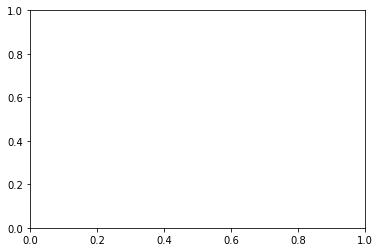

In [ ]:
y_plot, i_plot = torch.sort(Y_test, dim=0)
print(i_plot.shape)
print(model(X_test)[i_plot].squeeze().shape)
plt.plot(model(X_test)[i_plot].squeeze().detach())
plt.plot(Y_test.detach())
plt.legend(["Estimativa", "Real"])

In [ ]:
plt.scatter(Y_test.detach(), model(X_test).detach())